In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import csv
from collections import Counter

In [2]:
def distribution(records, question):
    "Get distribution of answers, for a given question."
    c = Counter(record[question] for record in records)
    total = sum(c.values())
    empty = c['']
    counts = {key: {"number": value, 
                    "percentage": (value/total) * 100, 
                    "percentage_answered": (value/(total-empty)) * 100} 
                for key, value in c.items()}
    try:
        del counts['']['percentage_answered']
    except:
        pass
    return counts


def get_questions(question, number):
    "Get questions for a range of questions in a grid."
    texts = []
    for i in range(1,number+1):
        item = f'Q{question}_{i}'
        text = questions[item]
        text = text.split('-')[-1].strip()
        texts.append(text)
    return texts


def get_texts(records, question):
    "Get answer texts."
    texts = []
    for record in records:
        answer = record[question]
        identifier = record['ResponseId']
        if not answer == '':
            texts.append([identifier, answer])
    return texts


def basic_stats(records, question):
    "Print basic statistics about the results."
    counts = distribution(records, question)
    for key, results in counts.items():
        if not key == '':
            print(f"{key}: {results['number']} ({results['percentage_answered']:.2f}%)")

    
def underscored(base, number, records):
    "Get answer distribution for all subquestions."
    results = dict()
    for i in range(1, number+1):
        question = f"Q{base}_{i}"
        results[question] = distribution(records, question)
    return results


def agreement(counts):
    "Select percentage answered for all answers except the empty string."
    results = dict()
    for answer in ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']:
        try:
            results[answer] = counts[answer]['percentage_answered']
        except:
            results[answer] = 0
    return results


# No longer needed:
# def enumerate_ids(iterable):
#     "Enumerate iterable with zero-padded IDs."
#     for i, element in enumerate(iterable):
#         yield 'comment-' + str(i).zfill(3), element


def write_texts(texts, filename):
    "Write texts from a list to a file."
    with open('./texts/' + filename,'w') as f:
        writer = csv.writer(f)
        writer.writerow(['identifier', 'comment', 'code'])
        writer.writerows([row + ['Original comment'] for row in texts])

In [3]:
df = pd.read_excel("[Distributed] Perceptions of Error Analysis_February 28, 2022_03.47.xlsx")
df = df.fillna('')
records = df.to_dict("records")

/Users/emiel/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
consented = [record for record in records if str(record['Q1 ']).startswith("Yes")]

print(len(consented))

# For subgroup analysis:
academia = [record for record in records if str(record['Q2'])=='Academia']
industry = [record for record in records if str(record['Q2'])=='Industry']

67


In [5]:
# If necessary, here are all questions:
questions = records[0]

In [6]:
questions

{'StartDate': 'Start Date',
 'EndDate': 'End Date',
 'Status': 'Response Type',
 'Progress': 'Progress',
 'Duration (in seconds)': 'Duration (in seconds)',
 'Finished': 'Finished',
 'RecordedDate': 'Recorded Date',
 'ResponseId': 'Response ID',
 'DistributionChannel': 'Distribution Channel',
 'UserLanguage': 'User Language',
 'Q1 ': 'Informed consent\n\n \n\nThis is the consent form for our study about the status of error analysis in NLG. Full details about this study were provided on the previous page. If you want to read this information again, you can go back to the previous page. If anything is still unclear about this study, please contact: C.W.J.vanMiltenburg@tilburguniversity.edu\n\n \n\nConsent\n\nBy consenting, you indicate that you have read the description on the previous page, that you are voluntarily taking part in this study, and that you allow for your data to be processed. This means that:\n\n\n\tYou agree to your responses being anonymously recorded.\n\tYour answers wi

In [7]:
"""
TODO:
- Subgroup analysis: academia vs industry
- Heatmap tables
"""

'\nTODO:\n- Subgroup analysis: academia vs industry\n- Heatmap tables\n'

# Demographics

In [8]:
# Where do people come from?
basic_stats(consented, "Q2")

Academia: 51 (85.00%)
Industry: 8 (13.33%)
Other: 1 (1.67%)


In [9]:
# Time spent working in NLG:
basic_stats(consented, "Q3")

6-10 years: 5 (8.47%)
Less than 2 years: 13 (22.03%)
2-5 years: 23 (38.98%)
11 or more years: 13 (22.03%)
I don't work in NLG: 5 (8.47%)


In [10]:
# Read an error analysis:
basic_stats(consented, "Q4")

Yes: 33 (67.35%)
No: 16 (32.65%)


In [11]:
# Is it surprising that you haven't read an error analysis?
basic_stats(consented, "Q8")

Yes, because:: 3 (42.86%)
No, because:: 4 (57.14%)


In [12]:
# Why is it surprising?:
texts = get_texts(consented, 'Q8_1_TEXT')
write_texts(texts, "surprising_because.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2viGZF9YUjaTxAZ using NLG systems every day, I know that however good the output is, it still makes small mistakes that need correcting such as confusing "me" and "you" roles.
----
R_3PUctIwcmDJt5t4 Without an understanding of errors, especially regarding what the most frequent errors involve, it is quite hard to correctly develop a system. It may end up being just blind hyperparameter optimisation (for NN ones)
----
R_2c0i363Fh3IQN3w I haven't read plenty of literature as NLG is only part of my research
----


In [13]:
# Why is it not surprising?:
texts = get_texts(consented, 'Q8_2_TEXT')
write_texts(texts, "not_surprising_because.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_3CClKJCQVTV5fKQ Page limit is often too less to report a detailed error analysis. Also manually annotation of errors is very time consuming, even if the training data is already manually annotated and the test data manually evaluated. 
----
R_2at4iBHFbZ9qXF9 it is time-consuming and tedious. Furthermore, it seems there is disagreement about standards, so that results cannot be compared sensibly.
----


In [14]:
# Carried out an error analysis:
basic_stats(consented, 'Q9')

Yes: 25 (67.57%)
No: 12 (32.43%)


In [15]:
# Willing to carry one out again (only people who answered 'yes'):
basic_stats(consented, 'Q28')

Probably yes: 7 (30.43%)
Definitely yes: 15 (65.22%)
Probably not: 1 (4.35%)


In [16]:
# Explanation for previous question
texts = get_texts(consented, 'Q29')
write_texts(texts, "carry_out_again_because.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp Not on a formal and structured level as for now.
----
R_3EVTcFVWkcADmAn It can improve the results and quality of generations.
----
R_1Fb4cMbBLCr1Mps Need to measure accuracy of generated texts
----
R_2Bx0flTszYdxDPA They are too useful to not do them
----
R_tK6Arub4LFxhMTT Sometimes it is needed...
----
R_1OxiIuva6OIySjr I think it's useful
----
R_9FWWZPFa03RKtDb It is useful
----
R_8AMlQcW7cB0S0lH I think its important to manually inspect the data from a computational linguistic perspective and it can provide valuable insights into improving inputs perhaps or neural architectures in order to guarantee more semantically adequate   production systems.
----
R_3PmNb56WDtzFl00 Essential part of evaluation!
----
R_1msf0KMkf86xvU7 I do believe in the importance of error analysis, so I'll make sure to include them as much as possible. However, when working with collaborators, not everyone sees its importance and is willing to invest time (and resources) on it.
----
R_1oGS3s

In [17]:
# Considered carrying one out (only people who answered 'no'):
basic_stats(consented, 'Q12')

Never: 4 (36.36%)
Once or twice: 2 (18.18%)
I'm planning to carry out an error analysis in the future: 4 (36.36%)
Regularly: 1 (9.09%)


In [18]:
# Willing to carry one out (only people who answered 'no'):
basic_stats(consented, 'Q14')

Probably yes: 3 (25.00%)
Definitely yes: 4 (33.33%)
Might or might not: 4 (33.33%)
Probably not: 1 (8.33%)


In [19]:
# Reasons for not doing it:
texts = get_texts(consented, 'Q13')
write_texts(texts, "reason_for_not_carrying_out.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2viGZF9YUjaTxAZ Whilst I do correct errors, I've never really considered carrying out an error analysis.
----
R_3CClKJCQVTV5fKQ I didn't know of this option, I thought error description is enough. 
----
R_3PUctIwcmDJt5t4 I work in rule-based NLG, hence unexpected errors in output are unlikely
----
R_1DAuvy72fx3Y9px My work was on errors in people not text
----
R_cIRoJzsDgiLpSWB My studies are taking much of my time
----
R_1Owpizm5kuD60On Hasnt been a part of my research problem, but is becoming increasingly relevant 
----
R_3Oprj30Ag4eTLZO The NLG systems I worked on were rule based, and before we evaluated them we made sure that there were no errors.  We carried out task-based evaluations comparing different strategies, and sometimes asked users to judge fluency etc but there were no generation errors to analyse.
----
R_2at4iBHFbZ9qXF9 see above (tedious, lack of standards)
----
R_2ZESZwXOU9XYLO6 I used to work in NLG and don't any more (sorry there was no button for that at the beg

# Usefulness of error analyses

In [20]:
# Found useful:
basic_stats(consented, 'Q5')

Moderately useful: 11 (35.48%)
Slightly useful: 2 (6.45%)
Very useful: 7 (22.58%)
Extremely useful: 11 (35.48%)


In [21]:
# What was useful about the analyses?:
texts = get_texts(consented, 'Q6')
write_texts(texts, "uses_of_error_analysis.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp General attention to the topic
----
R_1Fb4cMbBLCr1Mps general taxonomy gives idea of challenging aspects
----
R_1zRNqaef0umL2QF Qualitative analysis plus examples more informative than numeric scores for understanding where improvements are still needed
----
R_2Bx0flTszYdxDPA They help ground the limitations of the systems And create directions for future work
----
R_tK6Arub4LFxhMTT Allows to assess whether things you belive could be improved are indeed the things that should be
----
R_1OxiIuva6OIySjr They help understand the limitation of the proposed method. 
----
R_9FWWZPFa03RKtDb It gives a complementary picture of standard metrics.
----
R_3CClKJCQVTV5fKQ Clear view on data and not only a cherry picking error description. The different categories are helpful to identify problems of the NLG system. NLG is often evaluated only by automatic metrics which are not perfect and do not take all issues into account, such a error analysis can help to identify errors and not

In [22]:
# For what kinds of papers are error analyses useful?:
texts = get_texts(consented, 'Q15')
write_texts(texts, "kinds_of_papers.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp KPI standards
----
R_3EVTcFVWkcADmAn Dialogue systems, response generations
----
R_1Fb4cMbBLCr1Mps all NLG research. 
----
R_1zRNqaef0umL2QF most NLG papers
----
R_2Bx0flTszYdxDPA All papers with an experimental component
----
R_tK6Arub4LFxhMTT Ones proposing improvements, especially if the improvements have a certain goal (e.g. changing syntax, did only the bottom line change? or something syntactic)
Probably can think of other things
----
R_9FWWZPFa03RKtDb Any paper really, but I understand that it is not always feasible, due to time and economic constraints. But it should be expected to a higher extent than currently.
----
R_2viGZF9YUjaTxAZ I think an error analysis would be useful for any papers where an NLG system is generating text, and making mistakes.  I hadn't heard of error analysis before this survey, but have read a lot of NLG papers, none of which contained an error analysis.  Not doing so, seems at best a little dishonest.
----
R_3CClKJCQVTV5fKQ All NLG 

In [23]:
# Reasons for disappointment:
texts = get_texts(consented, 'Q7')
write_texts(texts, "reasons_for_disappointment.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

# Barriers and enabling factors

In [24]:
# Challenges:
texts = get_texts(consented, 'Q10')
write_texts(texts, "challenges.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp Scale and resources
----
R_3EVTcFVWkcADmAn It's time consuming and some times to cover all types of errors is very hard.
----
R_1Fb4cMbBLCr1Mps benchmarked against what? time-consuming. necessity for IRR (but usually lack of willing qualified participants)
----
R_1zRNqaef0umL2QF Time pressure
----
R_2Bx0flTszYdxDPA They can be time consuming to get right because it means contextualising your numbers
----
R_tK6Arub4LFxhMTT Defining categories,
Choosing amount of effort to invest and in what
----
R_1OxiIuva6OIySjr It's not cool, so some of the co-authors had a push back
----
R_9FWWZPFa03RKtDb It is hard to define clearly, especially in utput with poor quality, where the source of errors can be multiple. There is a lack of clearly described schemes, and the ones that exists are typically not well documented.
----
R_8AMlQcW7cB0S0lH The lack of clear methodology - type of errors.   Some appear random they pick a 100 and categorise the errors with not error schema.  Often t

In [25]:
# Enough resources/reference materials at the time?
basic_stats(consented,'Q11')

No: 13 (56.52%)
Yes: 10 (43.48%)


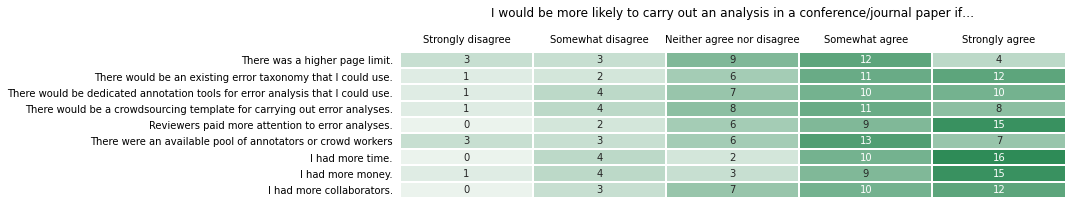

In [26]:
answers = ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']
records = []
for question, counts in underscored(16,9,consented).items():
    for answer in answers:
        percentage = 0
        if answer in counts:
            percentage = counts[answer]['number'] # NOTE: Changed into number rather than percentage!
        record = dict(question=question, answer=answer, percentage=percentage)
        records.append(record)

df = pd.DataFrame(records)
# Pivot to make a square table:
df = df.pivot(index='question', columns='answer', values='percentage')
# Reorder columns:
df = df[['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']]

plt.rcParams["figure.figsize"] = (15,3)
ax = sns.heatmap(df,cmap=sns.light_palette("seagreen", as_cmap=True),linewidth=1,cbar=False,annot=True)
ax.xaxis.tick_top()
plt.xticks(np.arange(5) + 0.5, labels=answers)
plt.yticks(np.arange(9) + 0.5, labels=get_questions(16,9))
plt.tick_params(top=False,left=False)
plt.xlabel('')
plt.ylabel('')
plt.title("I would be more likely to carry out an analysis in a conference/journal paper if…", y=1.2)
plt.tight_layout()
plt.savefig("Q16.pdf")

In [27]:
# Other barriers?
texts = get_texts(consented, 'Q17')
write_texts(texts, "other_barriers.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_3EVTcFVWkcADmAn No
----
R_1Fb4cMbBLCr1Mps no
----
R_1zRNqaef0umL2QF Trade-off between improving model/approach vs conducting error analysis
----
R_2Bx0flTszYdxDPA Time is the largest barrier
----
R_1OxiIuva6OIySjr Yes. It is not popular to conduct error analysis these days, unfortunately. 
----
R_2viGZF9YUjaTxAZ Not really.  I've just never considered running one.
----
R_3CClKJCQVTV5fKQ My supervisor do not see the relevance of it as we know no paper with such a error analysis and hence they recommend me to not spend much time on it. 
----
R_8AMlQcW7cB0S0lH No
----
R_1oGS3sNlc9Pzbhu Reproducibility of error analysis or human evaluation in general would be another concern, but there has been some interesting work recently in this area.
----
R_1Owpizm5kuD60On The importance given to error analyses is very low in the current research paradigm and we optimize for scores from reviewers for novelty not for wrror analysis
----
R_3dS2PTlM6FW2INE Mostly time and resources, if there is a stric

In [28]:
# Enough resources/reference materials currently?
basic_stats(consented,'Q20')

No, I am still missing:: 20 (66.67%)
Yes: 10 (33.33%)


In [29]:
# What is still missing?
texts = get_texts(consented, 'Q20_2_TEXT')
write_texts(texts, "missing.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp Standards
----
R_1Fb4cMbBLCr1Mps the ability to outsource error analysis!
----
R_9FWWZPFa03RKtDb Better documented taxonomies and procedures
----
R_2viGZF9YUjaTxAZ Funding.  Whilst an error analysis is important, the way I work would mean that performing an error analysis would take away time from working on the NLG system itself, which could in turn reduce errors made.  Funding could help this.
----
R_3CClKJCQVTV5fKQ Knowledge on the topic. I don't which resources exist yet. 
----
R_3PUctIwcmDJt5t4 Don't know which tool is missing, but the practice itself seems relatively novel, so I can expect new resources coming in the future.
----
R_1msf0KMkf86xvU7 Error analysis taxonomy, best practices, guidance, annotation tools.
----
R_3JhffzVm2xlXoiQ An efficient guideline and platform for setting the standard and replicable error analysis.
----
R_2at4iBHFbZ9qXF9 taxonomies, examples how to use them, tools
----
R_3dS2PTlM6FW2INE A good taxonomy of error categories you could 

In [30]:
# Other factors that make it more likely for you to carry out an error analysis?
texts = get_texts(consented, 'Q21')
write_texts(texts, "enabling.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp Automation
----
R_3EVTcFVWkcADmAn No
----
R_1Fb4cMbBLCr1Mps perhaps, but I cannot think of one at the moment
----
R_1zRNqaef0umL2QF More explicit recognition of value of error analysis in review forms
----
R_1OxiIuva6OIySjr Having it as a requirement. Or ideally making it more common, as a practice that is considered valuable, and then researchers would be inclined to do it not bc of a requirement.  
----
R_9FWWZPFa03RKtDb More money for research, and easier to higher short-term staff.
----
R_2viGZF9YUjaTxAZ No, on balance I think it's something that should be done when presenting a paper or a conference talk.
----
R_3CClKJCQVTV5fKQ More acceptance of error analysis in the NLP community. 
----
R_8AMlQcW7cB0S0lH Time and resources (to support the activity )
----
R_1DAuvy72fx3Y9px This is mostly a problem with research culture, when this (error analyses) becomes normal resources will be produced to fulfil the need for resources.
----
R_1msf0KMkf86xvU7 More money
----
R_

# General opinions

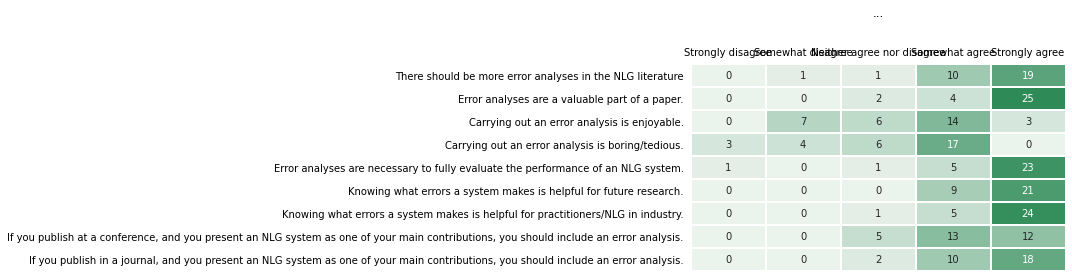

In [31]:
answers = ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']
records = []
for question, counts in underscored(18,9,consented).items():
    for answer in answers:
        percentage = 0
        if answer in counts:
            percentage = counts[answer]['number']
        record = dict(question=question, answer=answer, percentage=percentage)
        records.append(record)

df = pd.DataFrame(records)
# Pivot to make a square table:
df = df.pivot(index='question', columns='answer', values='percentage')
# Reorder columns:
df = df[['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']]

plt.rcParams["figure.figsize"] = (15,4)
ax = sns.heatmap(df,cmap=sns.light_palette("seagreen", as_cmap=True),linewidth=1,cbar=False,annot=True)
ax.xaxis.tick_top()
plt.xticks(np.arange(5) + 0.5, labels=answers)
plt.yticks(np.arange(9) + 0.5, labels=get_questions(18,9))
plt.tick_params(top=False,left=False)
plt.xlabel('')
plt.ylabel('')
plt.title("...", y=1.2)
plt.tight_layout()
plt.savefig("Q18.pdf")

In [32]:
# More/less/equally likely to include error analysis in journal
basic_stats(consented, 'Q19')

Equally: 14 (48.28%)
More: 15 (51.72%)


In [33]:
# Explanation for previous question:
texts = get_texts(consented, 'Q27')
write_texts(texts, "explanation_journal_preference.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_3EVTcFVWkcADmAn It's make my NLG system more accurate.
----
R_1Fb4cMbBLCr1Mps Based on assumption that the conference is NOT ACL or similiar top-tier venue!
----
R_1zRNqaef0umL2QF More space, less deadline pressure
----
R_2Bx0flTszYdxDPA The difference would be the depth of the analysis but heading something remains Important in both cases
----
R_tK6Arub4LFxhMTT The quality of my work should not differ by the venue
----
R_1OxiIuva6OIySjr I think it should be a norm, similar to reporducibility, at both venues.
----
R_9FWWZPFa03RKtDb There are more space and higher expectations.
----
R_2viGZF9YUjaTxAZ Having discovered that error analysis is a thing, if I were in the position of writing a paper or presenting at a conference, I would almost certainly include an error analysis.
----
R_3CClKJCQVTV5fKQ Higher page limit, more time to publish, more quality and higher demands in journal articles 
----
R_3PUctIwcmDJt5t4 Journal article usually offer a higher page limit.
----
R_8AMlQcW7cB0S0lH

# Requirements for reports of error analyses

In [34]:
texts = get_texts(consented, 'Q23')
write_texts(texts, "reporting_requirements.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_3EVTcFVWkcADmAn  May be a table that show correlation between different types of errors.
----
R_1Fb4cMbBLCr1Mps sufficient evidence to evaluate the standard of the human rater(s)
----
R_1zRNqaef0umL2QF Better to use a sensible characterization of errors that actually occur rather than trying to shoehorn them into an existing taxonomy
----
R_1OxiIuva6OIySjr This is important. Thanks!
----
R_2viGZF9YUjaTxAZ I think including the types of errors made is fine, however, I think that a list of the errors would be incredibly useful, as this would allow people reading papers to see commonality amongst NLG systems (for example, do GPT-J, GPT-3 and GPT-NeoX all make the same mistakes?)
----
R_3CClKJCQVTV5fKQ Annotation schema in which they explain their error categories if adapted from another NLG task, e.g., question answering might require other categories than machine translation.
Not only raw numbers, maybe percentages would be better. Also naming which categories were ignored and due to w

# General comments

In [35]:
texts = get_texts(consented, 'Q24')
write_texts(texts, "general_comments.csv")

for ident, text in texts:
    print(ident, text)
    print('----')

R_2uIYMUOPADUs0Gp Thanks 
----
R_3EVTcFVWkcADmAn No
----
R_1Fb4cMbBLCr1Mps no
----
R_1zRNqaef0umL2QF Talk to PCs about review forms
----
R_2viGZF9YUjaTxAZ No.  Thank you for introducing me to the concept of error analysis.  In at least some small way, I will probably take this concept and use it in our work.
----
R_3CClKJCQVTV5fKQ I didn't know much on error analysis before answering the questionnaire, hence, I couldn't rate the amountzof existing error analysis tools. I would have liked to have a "I don't know" field for the Likert scale questions. 
----
R_8AMlQcW7cB0S0lH This is an important study
----
R_1msf0KMkf86xvU7 Thanks for carrying out this survey. Looking forward to the results and the recommendations.
----
R_2wmLQttiaGr9OkJ thanks for doing such study
----
R_10rcJTKXKKERNbF Error analysis should focus on language features, text genre characteristics and  adequacy to the task, not a mere statistical analysis.
----
R_u3vQ66FYA58WEnL Thank you, it was a quite good survey. 
---